In [1]:
import control
import sympy
import numpy as np
import matplotlib.pyplot as plt
sympy.init_printing()

## Original System

In [2]:
s = control.tf([1, 0], [0, 1])

In [3]:
G = 1/((s+2)*s)
G

TransferFunction(array([1]), array([1, 2, 0]))

### Requirements

* 0 steady state error to unit ramp response
* damping ratio of sqrt(2)/2
* settling time of 2 seconds

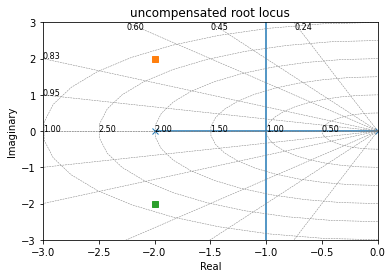

In [16]:
control.rlocus(G, xlim=[-3, 0], ylim=[-3, 3]);
plt.title('uncompensated root locus')
sd = -2 + 2j

plt.plot(np.real(sd), np.imag(sd), 's')
plt.plot(np.real(sd), -np.imag(sd), 's')

1 states have been removed from the model


Text(0.5, 1.0, 'uncompensated unit ramp response error')

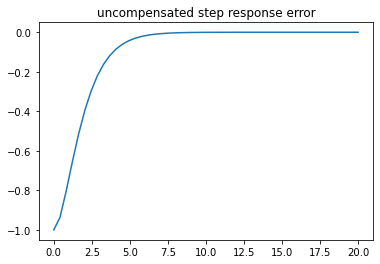

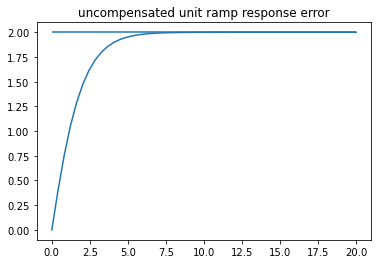

In [17]:
Gc = G/(1+G)
t, y = control.step_response(Gc, T=np.linspace(0, 20));
plt.plot(t, y - 1, label='y')
#plt.hlines(1, 0, 20, label='u')
plt.title('uncompensated step response error')

Kv = np.real((control.minreal(s*G).horner(0))[0, 0])
Kv

plt.figure()
t, y = control.step_response(Gc/s, T=np.linspace(0, 20));
plt.plot(t, t-y, label='e')
plt.hlines(1/Kv, 0, 20)
plt.title('uncompensated unit ramp response error')

## PID Compensator


* Do PD first

In [18]:
H_PD = 2*(s + 4)


Text(0.5, 1.0, 'PD compensated root locus')

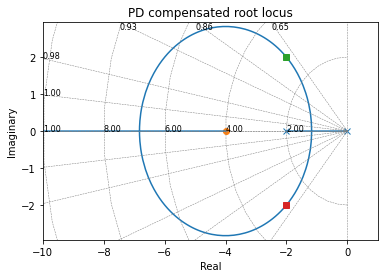

In [20]:
control.rlocus(G*H_PD, xlim=[-10, 1]);
plt.plot(-2, 2, 's')
plt.plot(-2, -2, 's')
plt.title('PD compensated root locus')

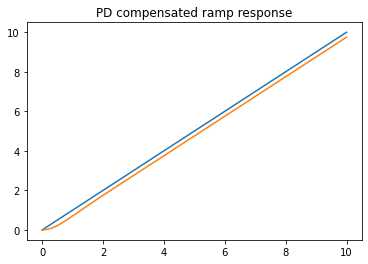

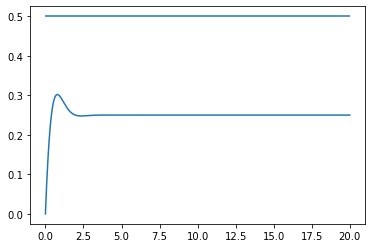

In [22]:
Gc_PD = G*H_PD/(1+G*H_PD)
t, y = control.step_response(Gc_PD/s, T=np.linspace(0, 10, 1000));
plt.plot(t, t)
plt.plot(t, y)
plt.title('PD compensated ramp response')

plt.figure()
t, y = control.step_response(Gc_PD/s, T=np.linspace(0, 20, 1000));
plt.plot(t, t-y)
plt.hlines(0.5, 0, 20)

## PI Compensator

In [23]:
z = 0.01
H_PI = (s+z)/s

In [24]:
H = H_PD*H_PI

In [25]:
H

TransferFunction(array([2.  , 8.02, 0.08]), array([1, 0]))

Find: 

K_P = 8.02, K_I = 0.08, K_D = 2

In [26]:
1/np.abs((G*H).horner(-2 + 2j))

array([[[1.00250312]]])

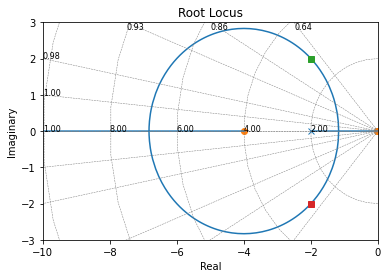

In [29]:
control.rlocus(G*H,xlim=[-10, 0], ylim=[-3, 3]);
plt.plot(-2, 2, 's')
plt.plot(-2, -2, 's')

In [33]:
control.minreal(G*H_PD*s).horner(0)

1 states have been removed from the model


array([[[4.+0.j]]])

In [34]:
control.minreal(G*H*s).horner(0)

1 states have been removed from the model


array([[[inf+nanj]]])

Text(0.5, 1.0, 'PID compensated ramp response error')

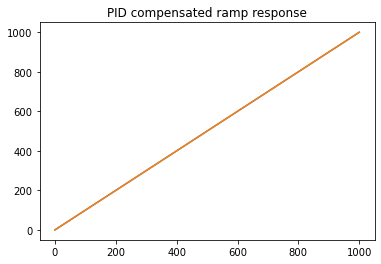

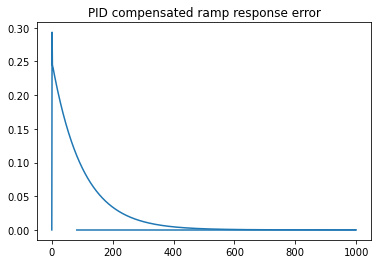

In [40]:
Gc_PID = G*H/(1+G*H)
t, y = control.step_response(Gc_PID/s, T=np.linspace(0, 1000, 1000));
plt.plot(t, t)
plt.plot(t, y)
plt.title('PID compensated ramp response')

plt.figure()
plt.plot(t, t - y)
plt.hlines(t[0], t[-1], 80)
plt.title('PID compensated ramp response error')